Base principale : Construction, Nettoyage et Stat descriptives

In [2]:
import pandas as pd


In [5]:
coureur_tdf = pd.read_csv("TDF_Riders_History.csv")

Nettoyage d'une première base de données (coureur_tdf) : 
    - Nom du coureur
    - Classement (par année)
    - Equipe
    - Temps
    - Année
    - Distance
    - ...

In [6]:
coureur_tdf.rename(columns={coureur_tdf.columns[2]: 'nom'}, inplace=True)
coureur_tdf['nom'] = coureur_tdf['nom'].str.title()
coureur_tdf['nom'] = coureur_tdf['nom'].str.title().str.strip()
coureur_tdf

,Unnamed: 0,Rank,nom,Rider No.,Team,Times,Gap,B,P,Year,Distance (km),Number of stages,TotalSeconds,GapSeconds,ResultType
0,0,1,Maurice Garin,1,TDF 1903 ***,94h 33' 14'',-,NaN,NaN,1903,2428,6,340394,0,time
1,1,2,Lucien Pothier,37,TDF 1903 ***,97h 32' 35'',+ 02h 59' 21'',NaN,NaN,1903,2428,6,351155,10761,time
2,2,3,Fernand Augereau,39,TDF 1903 ***,99h 02' 38'',+ 04h 29' 24'',NaN,NaN,1903,2428,6,356558,16164,time
3,3,4,Rodolphe Muller,33,TDF 1903 ***,99h 12' 44'',+ 04h 39' 30'',NaN,NaN,1903,2428,6,357164,16770,time
4,4,5,Jean-Baptiste Fischer,12,TDF 1903 ***,99h 41' 58'',+ 05h 08' 44'',NaN,NaN,1903,2428,6,358918,18524,time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9873,9873,146,Alexander Edmondson,144,TEAM DSM - FIRMENICH,87h 50' 21'',+ 05h 44' 39'',NaN,NaN,2023,3404,21,316221,20679,time
9874,9874,147,Frederik Frison,185,LOTTO DSTNY,88h 01' 02'',+ 05h 55' 20'',NaN,NaN,2023,3404,21,316862,21320,time
9875,9875,148,Yevgeniy Fedorov,194,ASTANA QAZAQSTAN TEAM,88h 02' 19'',+ 05h 56' 37'',NaN,NaN,2023,3404,21,316939,21397,time
9876,9876,149,Cees Bol,192,ASTANA QAZAQSTAN TEAM,88h 03' 26'',+ 05h 57' 44'',NaN,NaN,2023,3404,21,317006,21464,time


Nettoyage d'une deuxième base de données (prix_coureur_tdf): 

In [8]:
prix_coureur_tdf = pd.read_csv("palmares_tdf2.csv")
prix_coureur_tdf.columns = ['nom', 'nbre_tdf', 'nbre_victoire_etape', 'nbre_jour_maillot_jaune']
prix_coureur_tdf

,nom,nbre_tdf,nbre_victoire_etape,nbre_jour_maillot_jaune
0,Djamolidine Abdoujaparov,8,0,0
1,Jean Adriaenssens,8,0,0
2,Mario Aerts,10,0,0
3,Christophe Agnolutto,5,1,0
4,Joaquim Agostinho,13,0,0
...,...,...,...,...
904,Hubert Zilverberg,0,0,0
905,Urs Zimmermann,0,0,0
906,Joop Zoetemelk,0,0,0
907,Haimar Zubeldia,0,0,0


Fusion avec la première base de données et nettoyage du résultat : 

In [9]:
# Compter les occurrences dans la deuxième base de données
comptage = coureur_tdf.groupby('nom').size().reset_index(name='comptage_unique')

# Vérifier si 'comptage_unique' existe déjà dans prix_coureur_tdf, si oui, le supprimer
if 'comptage_unique' in prix_coureur_tdf.columns:
    prix_coureur_tdf.drop('comptage_unique', axis=1, inplace=True)

# Fusionner avec la première base de données
prix_coureur_tdf = pd.merge(prix_coureur_tdf, comptage, on='nom', how='left')

# Mettre à jour la colonne 'nbre_tdf' là où elle vaut 0
prix_coureur_tdf.loc[prix_coureur_tdf['nbre_tdf'] == 0, 'nbre_tdf'] = prix_coureur_tdf['comptage_unique']

# Supprimer la colonne 'comptage_unique' car elle n'est plus nécessaire
prix_coureur_tdf.drop('comptage_unique', axis=1, inplace=True)
prix_coureur_tdf = prix_coureur_tdf.dropna()
prix_coureur_tdf

,nom,nbre_tdf,nbre_victoire_etape,nbre_jour_maillot_jaune
0,Djamolidine Abdoujaparov,8.0,0,0
1,Jean Adriaenssens,8.0,0,0
2,Mario Aerts,10.0,0,0
3,Christophe Agnolutto,5.0,1,0
4,Joaquim Agostinho,13.0,0,0
...,...,...,...,...
902,Stefano Zanini,3.0,0,0
903,Italo Zilioli,1.0,0,0
905,Urs Zimmermann,3.0,0,0
906,Joop Zoetemelk,15.0,0,0


Fusion des DataFrames pour obtenir une base complète finale (merged_df) et nettoyage : 

In [10]:
# Fusion des DataFrames sur la colonne 'Stage_Key'
merged_df = pd.merge(prix_coureur_tdf, coureur_tdf, on='nom', how='inner')
merged_df = merged_df.dropna(axis=1, how='all')
# Suppression des colonnes inutiles
merged_df = merged_df.drop(['B', 'P', 'Unnamed: 0', 'Rider No.'], axis=1)

# Affichage des premières lignes du DataFrame fusionné pour vérification
merged_df

,nom,nbre_tdf,nbre_victoire_etape,nbre_jour_maillot_jaune,Rank,Team,Times,Gap,Year,Distance (km),Number of stages,TotalSeconds,GapSeconds,ResultType
0,Djamolidine Abdoujaparov,8.0,0,0,145,ALFA LUM,93h 16' 08'',+ 02h 32' 48'',1990,3504,22,335768,9168,time
1,Djamolidine Abdoujaparov,8.0,0,0,85,CARRERA JEANS,102h 50' 25'',+ 01h 49' 05'',1991,3914,23,370225,6545,time
2,Djamolidine Abdoujaparov,8.0,0,0,76,LAMPRE-POLTI,98h 00' 42'',+ 02h 03' 33'',1993,3714,21,352842,7413,time
3,Djamolidine Abdoujaparov,8.0,0,0,57,TEAM POLTI,105h 30' 12'',+ 01h 51' 34'',1994,3978,22,379812,6694,time
4,Djamolidine Abdoujaparov,8.0,0,0,56,NOVELL,94h 53' 54'',+ 02h 08' 55'',1995,3635,21,341634,7735,time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366,Haimar Zubeldia,15.0,0,0,36,RADIOSHACK LEOPARD,85h 21' 02'',+ 01h 24' 22'',2013,3404,21,307262,5062,time
3367,Haimar Zubeldia,15.0,0,0,8,TREK FACTORY RACING,90h 17' 03'',+ 00h 17' 57'',2014,3659,21,325023,1077,time
3368,Haimar Zubeldia,15.0,0,0,62,TREK FACTORY RACING,87h 23' 04'',+ 02h 36' 50'',2015,3354,21,314584,9410,time
3369,Haimar Zubeldia,15.0,0,0,24,TREK - SEGAFREDO,89h 57' 54'',+ 00h 53' 06'',2016,3525,21,323874,3186,time


Création d'une colonne classement : 

In [11]:
# Étape 1 : Grouper par équipe et année, puis obtenir les trois plus faibles temps
temps_par_equipe = merged_df.groupby(['Year', 'Team'])['TotalSeconds'].nsmallest(3).groupby(level=[0, 1]).sum()

# Étape 2 : Convertir la série groupée en DataFrame et réinitialiser l'index
temps_par_equipe = temps_par_equipe.reset_index()

# Étape 3 : Trier les équipes pour chaque année par leur temps total et obtenir le classement
temps_par_equipe['classement'] = temps_par_equipe.groupby('Year')['TotalSeconds'].rank(method='min')

# Étape 4 : Fusionner le classement avec le DataFrame original
df = pd.merge(merged_df, temps_par_equipe, on=['Year', 'Team'], how='left')
df_trie = df.sort_values(by='Year', ascending=True)
df

,nom,nbre_tdf,nbre_victoire_etape,nbre_jour_maillot_jaune,Rank,Team,Times,Gap,Year,Distance (km),Number of stages,TotalSeconds_x,GapSeconds,ResultType,TotalSeconds_y,classement
0,Djamolidine Abdoujaparov,8.0,0,0,145,ALFA LUM,93h 16' 08'',+ 02h 32' 48'',1990,3504,22,335768,9168,time,666070,9.0
1,Djamolidine Abdoujaparov,8.0,0,0,85,CARRERA JEANS,102h 50' 25'',+ 01h 49' 05'',1991,3914,23,370225,6545,time,1105170,18.0
2,Djamolidine Abdoujaparov,8.0,0,0,76,LAMPRE-POLTI,98h 00' 42'',+ 02h 03' 33'',1993,3714,21,352842,7413,time,705425,6.0
3,Djamolidine Abdoujaparov,8.0,0,0,57,TEAM POLTI,105h 30' 12'',+ 01h 51' 34'',1994,3978,22,379812,6694,time,762697,11.0
4,Djamolidine Abdoujaparov,8.0,0,0,56,NOVELL,94h 53' 54'',+ 02h 08' 55'',1995,3635,21,341634,7735,time,1029843,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366,Haimar Zubeldia,15.0,0,0,36,RADIOSHACK LEOPARD,85h 21' 02'',+ 01h 24' 22'',2013,3404,21,307262,5062,time,915020,14.0
3367,Haimar Zubeldia,15.0,0,0,8,TREK FACTORY RACING,90h 17' 03'',+ 00h 17' 57'',2014,3659,21,325023,1077,time,988060,13.0
3368,Haimar Zubeldia,15.0,0,0,62,TREK FACTORY RACING,87h 23' 04'',+ 02h 36' 50'',2015,3354,21,314584,9410,time,931447,12.0
3369,Haimar Zubeldia,15.0,0,0,24,TREK - SEGAFREDO,89h 57' 54'',+ 00h 53' 06'',2016,3525,21,323874,3186,time,971302,12.0


Souvegarde de la base de donnée finale : 

In [20]:
df.to_csv('merged_database.csv', index=False)

Programme test : NE MARCHE PAS ENCORE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Étape 1 : Prétraitement (exemple basique)
# Supposons que 'annee' est une colonne commune pour la fusion
merged_db['annee'] = pd.to_datetime(merged_df['Year'], format='%Y').dt.year
etapes_db['annee'] = pd.to_datetime(etapes_df['annee'], format='%Y').dt.year

# Étape 2 : Fusion des données
# Fusion basée sur l'année (ajustez le nom des colonnes si nécessaire)
combined_data = pd.merge(merged_db, etapes_db, on='annee', how='left')

# et 'classement' comme variable cible
X = combined_data[['nbre_tdf', 'nbre_victoire_etape', 'Weather']]
y = combined_data['classement']

# Gestion des données catégorielles pour 'Weather'
X = pd.get_dummies(X, columns=['Weather'])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 3 : Construction du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse}")

Statistiques descriptives :

In [13]:
merged_df.describe()

,nbre_tdf,nbre_victoire_etape,nbre_jour_maillot_jaune,Rank,Year,Distance (km),Number of stages,TotalSeconds,GapSeconds
count,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000
mean,7.809255,0.340848,0.178879,51.064076,1989.794126,3835.120439,22.658558,371919.769801,6140.823495
std,3.317535,0.554818,1.787953,39.158182,20.944516,417.361371,1.974917,64581.881577,4462.950273
min,1.000000,0.000000,0.000000,1.000000,1905.000000,2994.000000,11.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,18.000000,1974.000000,3497.000000,21.000000,319284.500000,2538.000000
50%,8.000000,0.000000,0.000000,43.000000,1991.000000,3753.000000,22.000000,345537.000000,5820.000000
75%,10.000000,1.000000,0.000000,76.000000,2008.000000,4109.000000,24.000000,417282.000000,8838.000000
max,18.000000,6.000000,34.000000,174.000000,2023.000000,5425.000000,29.000000,913722.000000,99021.000000


On calcule la moyenne par colonne et on affiche une année en particulier

In [14]:
# Sélectionner uniquement les colonnes numériques
colonnes_numeriques = merged_df.select_dtypes(include='number')

# Filtrer les données où 'Year' est supérieur à 1946 (on peut décider d'autres dâtes)
colonnes_numeriques = colonnes_numeriques[colonnes_numeriques['Year'] > 1946]

# Grouper par année
grouped_by_year = colonnes_numeriques.groupby('Year')

# Calculer la moyenne par colonne pour chaque groupe
mean_by_column = grouped_by_year.mean()

# Afficher la moyenne par colonne
print(mean_by_column)

groupe_1948 = grouped_by_year.get_group(1948)
print(groupe_1948)

      nbre_tdf  nbre_victoire_etape  nbre_jour_maillot_jaune       Rank  \
Year                                                                      
1947  4.714286             0.500000                 0.000000  17.928571   
1948  6.636364             0.000000                 3.090909  12.090909   
1949  5.421053             0.157895                 0.000000  22.736842   
1950  6.333333             0.222222                 1.944444  22.666667   
1951  6.500000             0.230769                 1.307692  28.769231   
...        ...                  ...                      ...        ...   
2019  6.933333             0.283333                 0.050000  64.250000   
2020  6.920000             0.300000                 0.020000  60.360000   
2021  7.022222             0.400000                 0.644444  57.022222   
2022  6.644444             0.466667                 0.688889  58.444444   
2023  5.565217             0.500000                 0.673913  60.869565   

      Distance (km)  Num

Base de données par coureur depuis 2010 pour voir les performances individuelles : 

In [15]:
# Supposez que votre DataFrame initial soit 'df'

# Convertir la colonne 'Year' en type datetime avec seulement l'année
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Filtrer les données pour les années à partir de 1980
df_since_2010 = df[df['Year'].dt.year >= 2010]

# Groupement par coureur
grouped_by_rider_since_2010 = df_since_2010.groupby('nom')

# Calcul des statistiques descriptives
average_rank_since_2010 = grouped_by_rider_since_2010['classement'].mean()
participation_count_since_2010 = grouped_by_rider_since_2010['Year'].count()
variance_performance_since_2010 = grouped_by_rider_since_2010['classement'].var()

# Création d'un nouveau DataFrame avec les données agrégées
aggregated_data_since_2010 = pd.DataFrame({
    'Moyenne_Classement': average_rank_since_2010,
    'Nombre_Participations': participation_count_since_2010,
    'Variance_Classement': variance_performance_since_2010
})

# Réinitialisation de l'index pour faire de 'nom' une colonne plutôt qu'un index
aggregated_data_since_2010.reset_index(inplace=True)

# Affichage du nouveau DataFrame
# print(aggregated_data_since_2010)


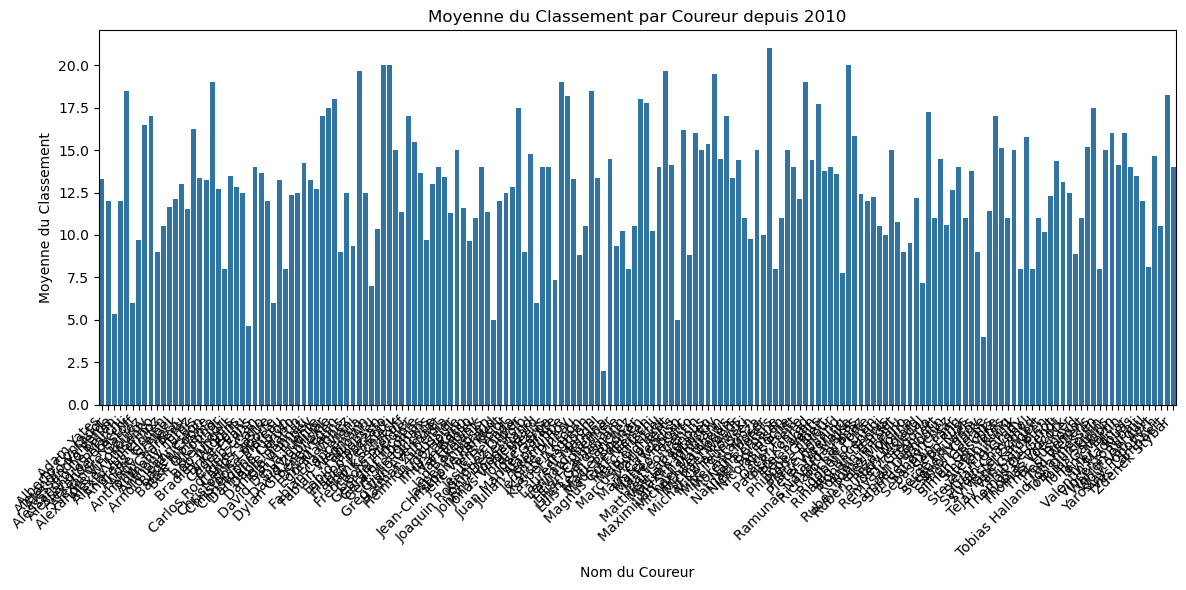

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer un graphique en barres pour la moyenne du classement depuis 1980
plt.figure(figsize=(12, 6))
sns.barplot(x='nom', y='Moyenne_Classement', data=aggregated_data_since_2010)
plt.title('Moyenne du Classement par Coureur depuis 2010')
plt.xlabel('Nom du Coureur')
plt.ylabel('Moyenne du Classement')
plt.xticks(rotation=45, ha='right')  # Rotation des noms de coureurs pour une meilleure lisibilité
plt.tight_layout()

# Afficher le graphique
plt.show()


Graphiques des stats depuis 2010 : 

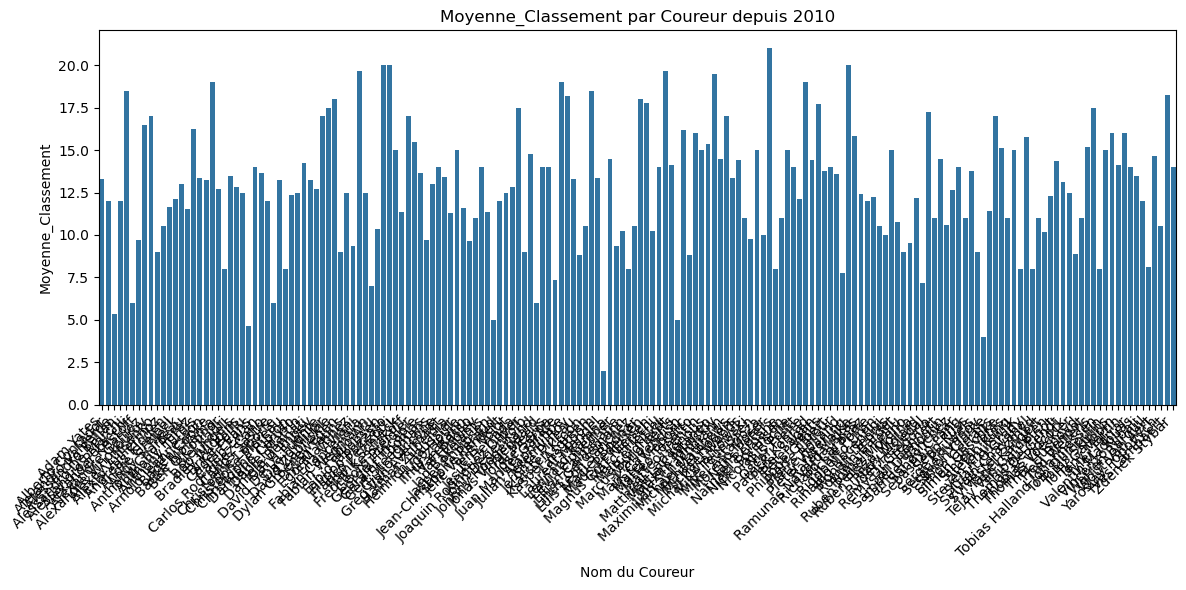

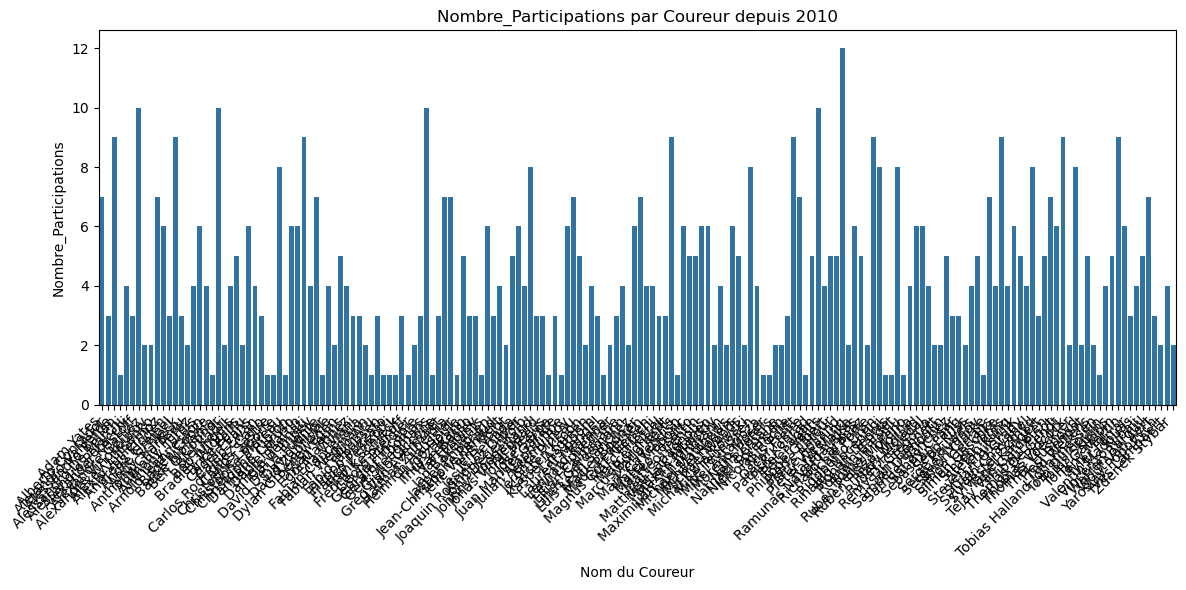

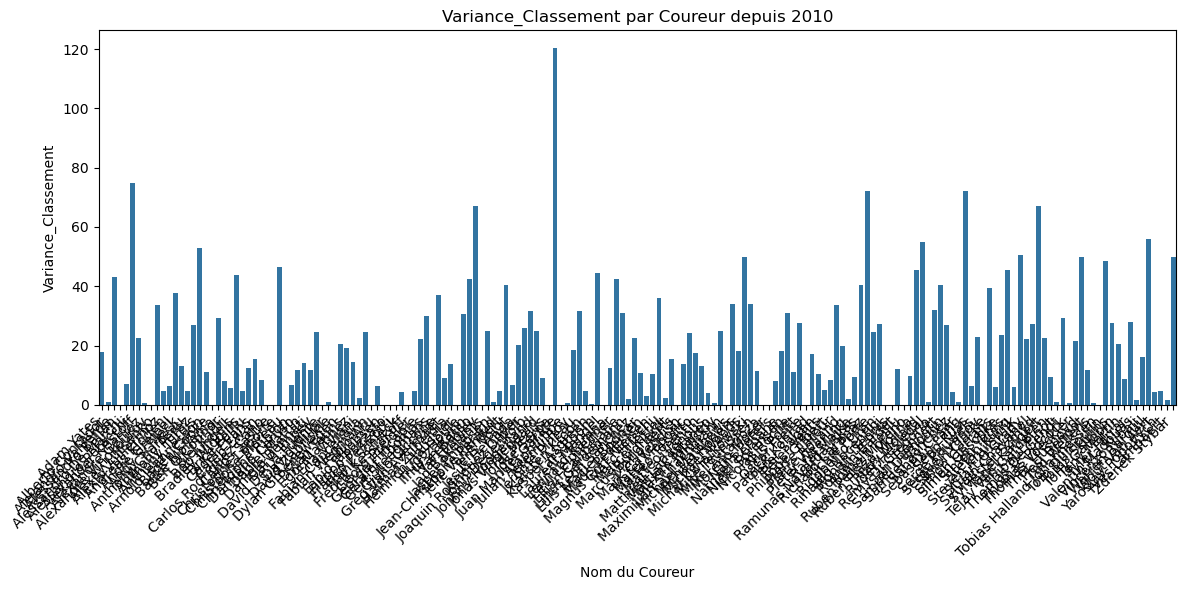

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des statistiques à visualiser
statistiques = ['Moyenne_Classement', 'Nombre_Participations', 'Variance_Classement']

# Boucle pour créer un graphique pour chaque statistique
for stat in statistiques:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='nom', y=stat, data=aggregated_data_since_2010)
    plt.title(f'{stat} par Coureur depuis 2010')
    plt.xlabel('Nom du Coureur')
    plt.ylabel(stat)
    plt.xticks(rotation=45, ha='right')  # Rotation des noms de coureurs pour une meilleure lisibilité
    plt.tight_layout()

# Afficher les graphiques
plt.show()


Base de données par coureur depuis 1980 pour voir les performances individuelles : 

In [18]:
# Supposez que votre DataFrame initial soit 'df'

# Filtrer les données pour les années à partir de 1980
df_since_1980 = df[df['Year'].dt.year >= 1980]

# Groupement par coureur
grouped_by_rider_since_1980 = df_since_1980.groupby('nom')

# Calcul des statistiques descriptives
average_rank_since_1980 = grouped_by_rider_since_1980['classement'].mean()
participation_count_since_1980 = grouped_by_rider_since_1980['Year'].count()
variance_performance_since_1980 = grouped_by_rider_since_1980['classement'].var()

# Création d'un nouveau DataFrame avec les données agrégées
aggregated_data_since_1980 = pd.DataFrame({
    'Moyenne_Classement': average_rank_since_1980,
    'Nombre_Participations': participation_count_since_1980,
    'Variance_Classement': variance_performance_since_1980
})

# Réinitialisation de l'index pour faire de 'nom' une colonne plutôt qu'un index
aggregated_data_since_1980.reset_index(inplace=True)


Effet du nombre de participation sur le classement moyen

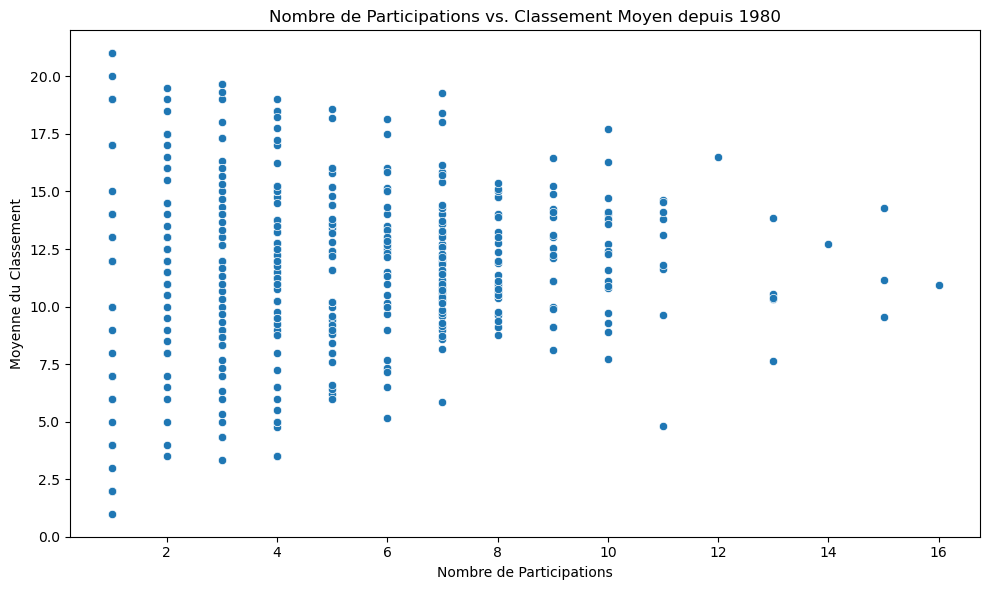

In [19]:
# Tracer un nuage de points pour le nombre de participations vs. le classement moyen
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nombre_Participations', y='Moyenne_Classement', data=aggregated_data_since_1980)
plt.title('Nombre de Participations vs. Classement Moyen depuis 1980')
plt.xlabel('Nombre de Participations')
plt.ylabel('Moyenne du Classement')
plt.tight_layout()

# Afficher le nuage de points
plt.show()
